In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
from scipy.stats import norm

from kernels_class import *
from rbf_kernel import *
from generation import *

In [23]:
params = {'beta': [1],
          'n_plus': [500],
          'n_minus': [500], 
          'n_target': [500], 
          'pi_target': [0.1, 0.3, 0.5, 0.7, 0.9],
          'p': [int(5)],
          'seed': [int(i) for i in np.linspace(1, 100, 100)]}

In [24]:
df_params = pd.DataFrame(itertools.product(*params.values()),columns=params.keys())

In [26]:
res = simulation(df_params, generate_sample_Nstd_Nstd_CC, params.keys(), 
           ['pi_nmr_u', 'pi_ipr_u',  
            'var_plug-in', 'var_explicit'])

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [01:37<00:00,  5.14it/s]


In [34]:
res['pi_target'].unique()

array([0.1, 0.3, 0.5, 0.7, 0.9])

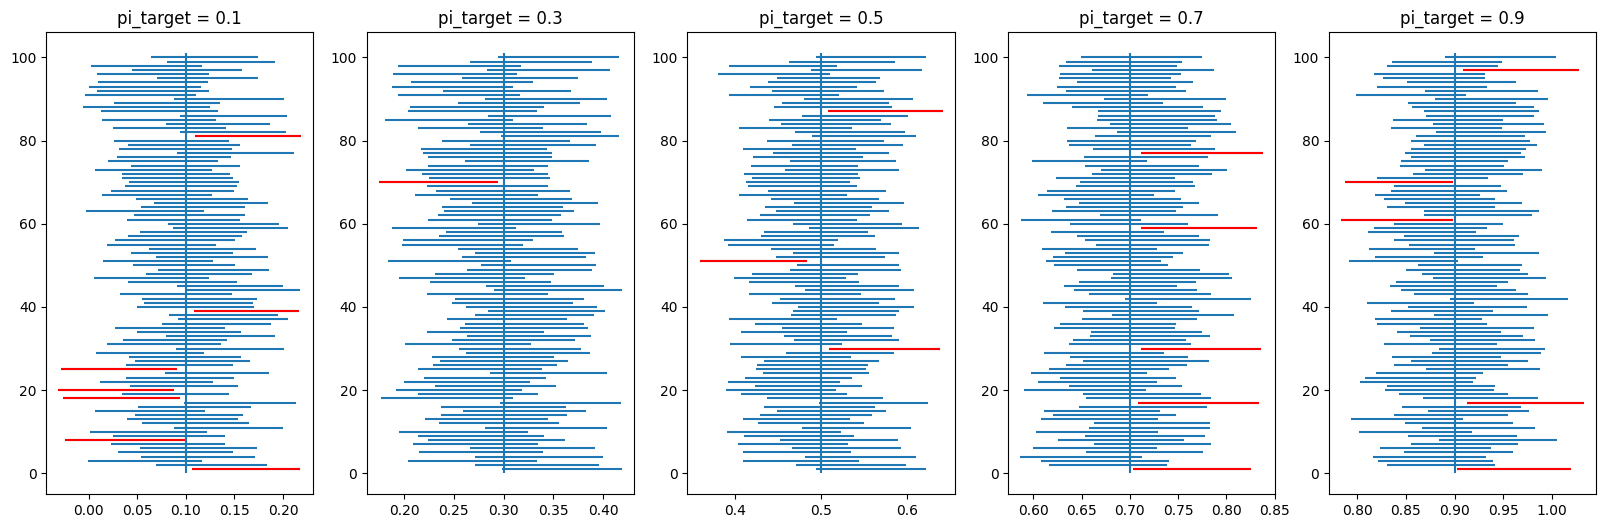

In [56]:
fig, axes = plt.subplots(1,5, figsize=(20,6))
for p_ind, p in zip(range(5), [0.1, 0.3, 0.5, 0.7, 0.9]):
    res_tmp = res[res['pi_target'] == p]   
    res_tmp.reset_index(inplace=True)
    lower_bound = (res_tmp['pi_ipr_u'] - 1.96*np.sqrt(res_tmp['r_n']*res_tmp['var_explicit'])).to_list()
    upper_bound = (res_tmp['pi_ipr_u'] + 1.96*np.sqrt(res_tmp['r_n']*res_tmp['var_explicit'])).to_list()
    # lower_bound.reset_index()
    # upper_bound.reset_index()
    for i in range(res_tmp.shape[0]):
        # print(lower_bound[i])
        # print('sdfg')
        axes[p_ind].hlines(res_tmp.loc[i, 'seed'], lower_bound[i], upper_bound[i])
        if p < lower_bound[i] or p > upper_bound[i]:
            axes[p_ind].hlines(res_tmp.loc[i, 'seed'], lower_bound[i], upper_bound[i], color='red')
    axes[p_ind].vlines(p, 0, 101)
    axes[p_ind].set_title('pi_target = '+str(p))
plt.show()

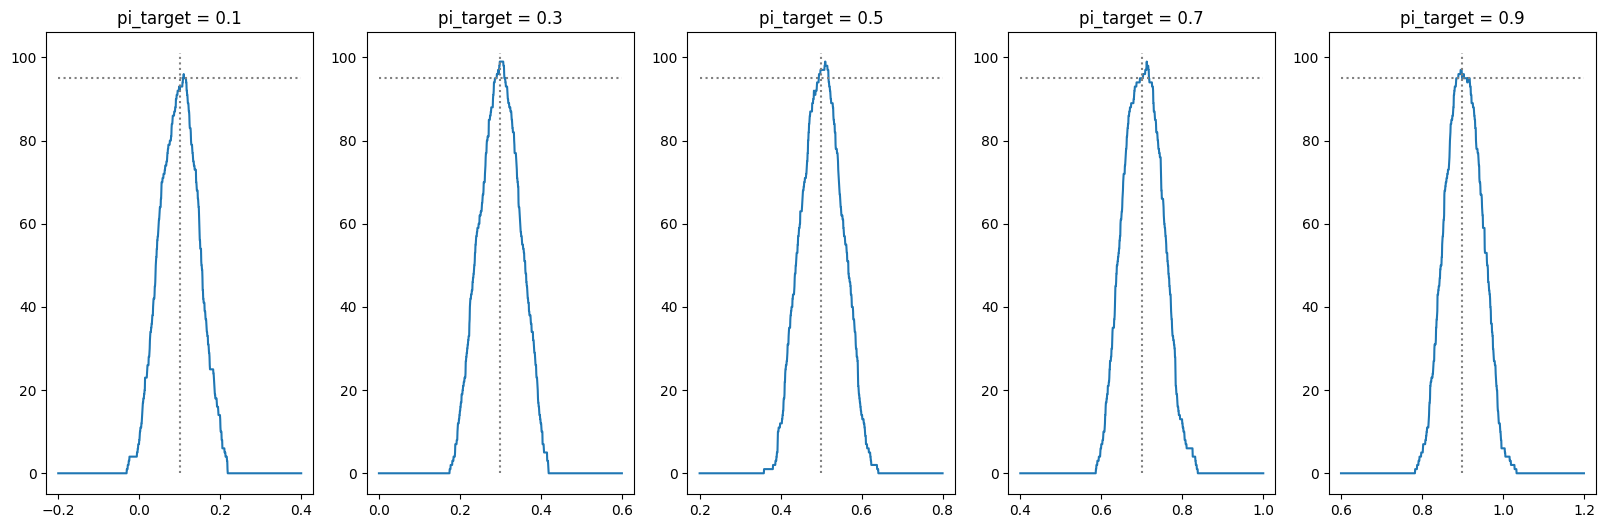

In [72]:
fig, axes = plt.subplots(1,5, figsize=(20,6))
for p_ind, p in zip(range(5), [0.1, 0.3, 0.5, 0.7, 0.9]):
    res_tmp = res[res['pi_target'] == p]   
    res_tmp.reset_index(inplace=True)
    lower_bound = (res_tmp['pi_ipr_u'] - 1.96*np.sqrt(res_tmp['r_n']*res_tmp['var_explicit'])).to_list()
    upper_bound = (res_tmp['pi_ipr_u'] + 1.96*np.sqrt(res_tmp['r_n']*res_tmp['var_explicit'])).to_list()
    # lower_bound.reset_index()
    # upper_bound.reset_index()
    x_seq = np.linspace(p-0.3,p+0.3, 1000)
    y_seq = np.zeros(1000)
    for j in range(100):
        for i in range(1000):
            if x_seq[i] > lower_bound[j] and x_seq[i] < upper_bound[j]:
                y_seq[i] += 1
    axes[p_ind].plot(x_seq, y_seq)
    axes[p_ind].vlines(p, 0, 101, linestyle='dotted', color='gray')
    axes[p_ind].hlines(95, p-0.3,p+0.3, linestyle='dotted', color='gray')
    axes[p_ind].set_title('pi_target = '+str(p))
plt.show()

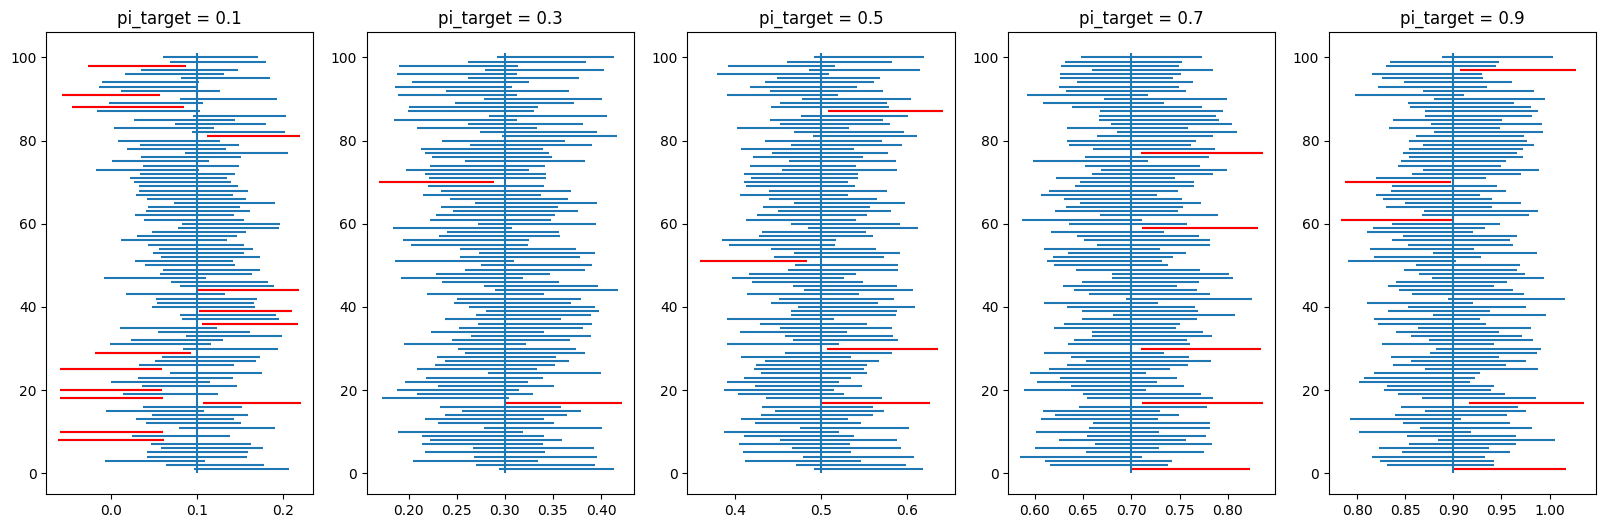

In [62]:
fig, axes = plt.subplots(1,5, figsize=(20,6))
for p_ind, p in zip(range(5), [0.1, 0.3, 0.5, 0.7, 0.9]):
    res_tmp = res[res['pi_target'] == p]   
    res_tmp.reset_index(inplace=True)
    lower_bound = (res_tmp['pi_nmr_u'] - 1.96*np.sqrt(res_tmp['r_n']*res_tmp['var_explicit'])).to_list()
    upper_bound = (res_tmp['pi_nmr_u'] + 1.96*np.sqrt(res_tmp['r_n']*res_tmp['var_explicit'])).to_list()
    # lower_bound.reset_index()
    # upper_bound.reset_index()
    for i in range(res_tmp.shape[0]):
        # print(lower_bound[i])
        # print('sdfg')
        axes[p_ind].hlines(res_tmp.loc[i, 'seed'], lower_bound[i], upper_bound[i])
        if p < lower_bound[i] or p > upper_bound[i]:
            axes[p_ind].hlines(res_tmp.loc[i, 'seed'], lower_bound[i], upper_bound[i], color='red')
    axes[p_ind].vlines(p, 0, 101)
    axes[p_ind].set_title('pi_target = '+str(p))
plt.show()

In [86]:
params = {'beta': [1],
          'n_plus': [500],
          'n_minus': [500], 
          'n_target': [500], 
          'pi_target': [0.1, 0.3, 0.5, 0.7, 0.9],
          'p': [int(5)],
          'seed': [int(i) for i in np.linspace(1, 100, 100)]}

In [87]:
df_params = pd.DataFrame(itertools.product(*params.values()),columns=params.keys())

In [88]:
for n0 in [50, 100, 250, 1000]:
    params0 = {'beta': [1],
            'n_plus': [n0],
            'n_minus': [n0], 
            'n_target': [n0], 
            'pi_target': [0.1, 0.3, 0.5, 0.7, 0.9],
            'p': [int(5)],
            'seed': [int(i) for i in np.linspace(1, 100, 100)]}
    df_params0 = pd.DataFrame(itertools.product(*params0.values()),columns=params0.keys())
    df_params = pd.concat((df_params, df_params0), ignore_index=True)


In [89]:
res = simulation(df_params, generate_sample_Nstd_Nstd_CC, params.keys(), 
           ['pi_nmr_u', 'pi_ipr_u',  
            'var_plug-in', 'var_explicit', 'var_rbf'])

100%|██████████| 2500/2500 [02:28<00:00, 16.88it/s] 


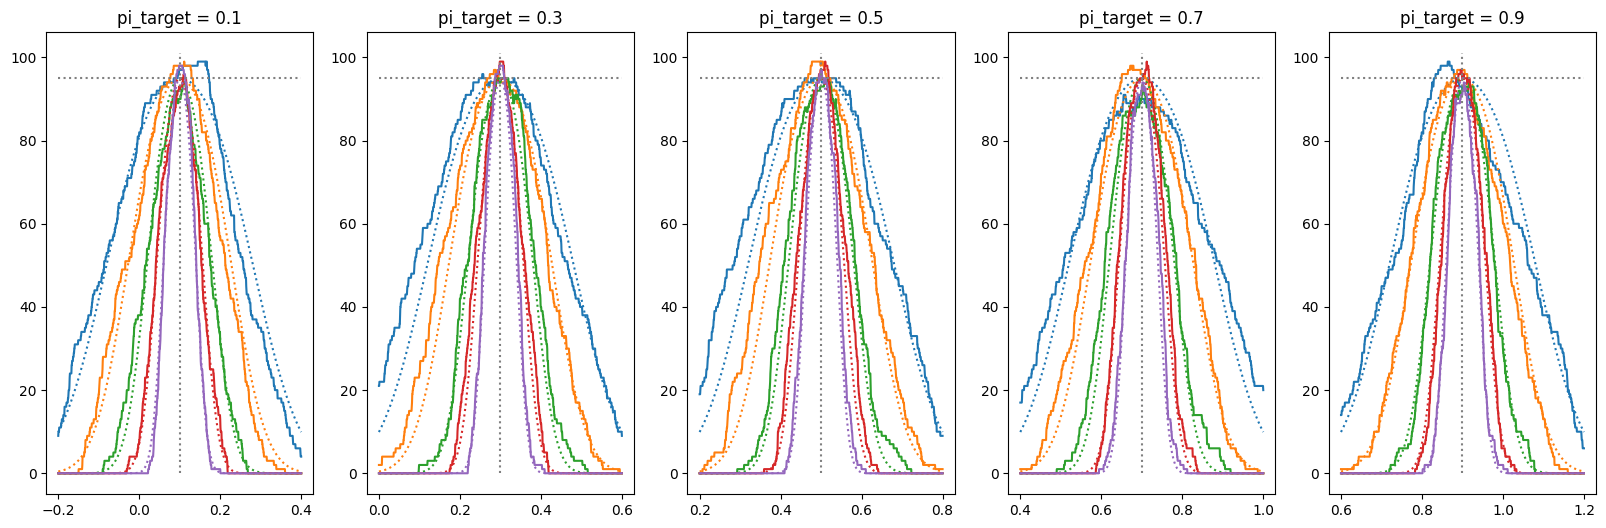

In [137]:
fig, axes = plt.subplots(1,5, figsize=(20,6))
for p_ind, p in zip(range(5), [0.1, 0.3, 0.5, 0.7, 0.9]):
    
    for n_ind, n in zip(range(5), [50, 100, 250, 500, 1000]):
        res_tmp = res[(res['pi_target'] == p) & (res['n_target'] == n)]
        res_tmp.reset_index(inplace=True)
        lower_bound = (res_tmp['pi_ipr_u'] - 1.96*np.sqrt(res_tmp['r_n']*res_tmp['var_explicit'])).to_list()
        upper_bound = (res_tmp['pi_ipr_u'] + 1.96*np.sqrt(res_tmp['r_n']*res_tmp['var_explicit'])).to_list()
        # lower_bound.reset_index()
        # upper_bound.reset_index()
        x_seq = np.linspace(p-0.3,p+0.3, 1000)
        y_seq = np.zeros(1000)
        for j in range(100):
            for i in range(1000):
                if x_seq[i] > lower_bound[j] and x_seq[i] < upper_bound[j]:
                    y_seq[i] += 1
        axes[p_ind].plot(x_seq, y_seq)

        y_seq2 = norm.cdf(norm.ppf(0.975) - (p-x_seq)/np.sqrt(res_tmp['r_n']*res['var_rbf'])[0]) - norm.cdf(-norm.ppf(0.975) - (p-x_seq)/np.sqrt(res_tmp['r_n']*res['var_rbf'])[0])
        axes[p_ind].plot(x_seq, 100*y_seq2, color='C'+str(n_ind), linestyle='dotted')

        # axes[p_ind].vlines(p - 1.96*np.sqrt(res_tmp['r_n']*res['var_rbf']), 0, 101, linestyle='dotted', color='C'+str(n_ind))
        # axes[p_ind].vlines(p + 1.96*np.sqrt(res_tmp['r_n']*res['var_rbf']), 0, 101, linestyle='dotted', color='C'+str(n_ind))
    axes[p_ind].vlines(p, 0, 101, linestyle='dotted', color='gray')
    axes[p_ind].hlines(95, p-0.3,p+0.3, linestyle='dotted', color='gray')
    axes[p_ind].set_title('pi_target = '+str(p))
plt.show()